# Linear Regression
다음의 항목들에 대해서 학습합니다.

* 선형회귀(Linear Regression)
* 회귀모델 평가


## 1.환경준비

### (1) Import

In [88]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings  # 경고메시지 제외

warnings.filterwarnings(action='ignore')

### (2) data loading

In [89]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)

|	변수	|	설명	|
|	----	|	----	|
|	**medv**	|	**타운별 집값(중위수), target**	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율, 편의시설(관공서, 주요 시설)	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 이해

### (1) 둘러보기

In [90]:
# 상/하위 몇개 행을 살펴 봅시다.
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [91]:
# 각 칼럼의 타입을 살펴 봅시다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 3.데이터 준비

### (1) 데이터 정리

In [92]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [93]:
data.drop(['black'], axis=1, inplace=True)

### (2) 데이터분할1 : x, y 나누기

In [94]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

### (5) 데이터분할2 : train : validation 나누기

In [95]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state=2022)

### (6) Scaling

## 4.모델링 : 단순회귀

### (1)학습할 데이터 준비

* 모델링을 시작하기 전에...
    * 데이터를 살펴보면서, 어떤 변수가 집값을 예측하는데 가장 중요할까요?

tax 혹은 lstat

* lstat(하위계층 비율)로만 집값(medv)을 예측하는 모델을 만들어 봅시다.

In [96]:
# 학습에 사용할 변수를 지정합니다.
features = ['lstat']

# 지정된 변수로 데이터셋을 만듭니다. 
# 학습과 검증시 아래 데이터셋 이름을 사용합니다.
x_train1 = x_train[features]
x_val1 = x_val[features]

In [97]:
x_train1.head()

,lstat
257,5.12
371,9.53
253,3.54
332,7.83
454,18.71


### (2) 필요한 함수 불러오기
이 부분은 파일의 제일 첫 부분에서 한꺼번에 수행해도 좋습니다.

In [98]:
# 모델링용
from sklearn.linear_model import LinearRegression

# 회귀모델 평가용
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### (3) 모델선언

In [99]:
model1 = LinearRegression()

### (4) 모델링(학습)


In [111]:
model1.fit(x_train1, y_train)

LinearRegression()

* 회귀계수 확인하기

In [112]:
print('회귀계수 : ', model1.coef_)
print('절편 : ', model1.intercept_)

회귀계수 :  [-0.9568563]
절편 :  34.676249051494665


### (5) 검증 : 예측

In [113]:
pred1 = model1.predict(x_val1)

### (6) 검증 : 평가

* 평가용 함수들은 대부분 (실제값, 예측값)

In [114]:
# 평균오차:
mean_absolute_error(y_val, pred1)

4.138380487348265

## 5.평가

### (1) 오차의 비로 평가하기 : R2 Score

* 평균 모델의 오차와 회귀모델 오차
    * 평균 모델과 실제 값 과의 차이(SST)
    * 평균 모델과 회귀모델 과의 차이(SSR)
    * 실제 값과 회귀모델 과의 차이(SSE)


In [115]:
# 실제와 예측 데이터 5건씩 저장
tmp_y = y_val[:5]
tmp_p = pred1[:5]

# 실제값의 평균오차 저장
tmp_y_mean = tmp_y.mean()

In [116]:
# SST
sst = np.sum(np.power(tmp_y - tmp_y_mean, 2))
sst

232.14800000000005

In [117]:
# SSE
sse = np.sum(np.power(tmp_y - tmp_p, 2))
sse

36.39837929489292

In [118]:
# R2 Score = 1- SSE/SST
1 - (sse / sst)

0.8432104549903815

In [119]:
# 제공된 함수와 비교해 봅시다.
r2_score(tmp_y, tmp_p)


0.8432104549903815

### (2)오차의 양과 율로 평가하기

In [120]:
# MSE
mean_squared_error(y_val, pred1)

31.563327757446412

In [121]:
# RMSE
mean_squared_error(y_val, pred1, squared=False)

5.618124932523877

In [122]:
# MAE (평균 오차)
mean_absolute_error(y_val, pred1)

4.138380487348265

In [123]:
# MAPE (평균 오차율): 원래 개념은 100(%)을 곱해야 한다. 그렇지만 sklearn 함수는 100을 곱하지 않고 결과를 제공한다.
mean_absolute_percentage_error(y_val, pred1)

0.22398686231166276

In [124]:
# 1 - MAPE : 회귀모델의 정확도
1 - mean_absolute_percentage_error(y_val, pred1)

0.7760131376883372

## 6.연습문제
* 모델을 2개 더 만들어 봅시다. 여러분이 중요하다고 생각한 변수로 모델2, 모델3을 만들어 봅시다.
    * model2 : 중요하다고 생각한 변수1  --> medv
    * model3 : 중요하다고 생각한 변수2  --> medv
* 모델1,2,3의 성능을 비교해 봅시다.
* 평가는 RMSE, MAE, MAPE로 사용

### (1) 모델2

In [125]:
# 학습에 사용할 변수를 지정합니다.
features = ['tax']
x_train2 = x_train[features]
x_val2 = x_val[features]

In [126]:
# 선형 모델 선언

model2 = LinearRegression()

In [127]:
# 모델 학습 및 예측

model2.fit(x_train2, y_train)
pred2 = model2.predict(x_val2)

In [128]:
model2.coef_, model2.intercept_

(array([-0.0221842]), 31.895014835450446)

In [129]:
# R2

r2_score(y_val, pred2)

0.31934696191444245

In [130]:
# MSE

mean_squared_error(y_val, pred2)

58.306685690912424

In [131]:
# RMSE

mean_squared_error(y_val, pred2, squared=False)

7.635881461292627

In [132]:
# MAE

mean_absolute_error(y_val, pred2)

5.933090483161751

In [133]:
# MAPE

mean_absolute_percentage_error(y_val, pred2)

0.3612013541991554

In [134]:
# 회귀모델의 정확도

1 - mean_absolute_percentage_error(y_val, pred2)

0.6387986458008446

### (2) 모델3

In [135]:
# 학습에 사용할 변수를 지정합니다.
features = ['crim']
x_train3 = x_train[features]
x_val3 = x_val[features]

In [136]:
model3 = LinearRegression()

In [137]:
model3.fit(x_train3, y_train)
pred3 = model3.predict(x_val3)

In [138]:
model3.coef_, model3.intercept_

(array([-0.3570669]), 24.214633238567504)

In [139]:
# R2 score

r2_score(y_val, pred3)

0.19988423690315305

In [140]:
# MSE

mean_squared_error(y_val, pred3)

68.54020434030336

In [141]:
# RMSE

mean_squared_error(y_val, pred3, squared=False)

8.278901155364965

In [142]:
# MAE

mean_squared_error(y_val, pred3)

68.54020434030336

In [143]:
# MAPE

mean_absolute_percentage_error(y_val, pred3)

0.40490343077615576

In [144]:
# 회귀모델의 정확도

1 - mean_absolute_percentage_error(y_val, pred3)

0.5950965692238442

## 7.모델링2 : 다중회귀

* 이번에는 다음의 변수로 예측하는 모델을 각각 만들어 봅시다.
    * model4 : lstat + ptratio 
    * model5 : lstat + ptratio + crim
    * model6 : 전체 변수

### (1) 모델4 

In [145]:
target = ['lstat', 'ptratio']

x_train4 = x_train.loc[:, target]
x_val4 = x_val.loc[:, target]

In [146]:
model4 = LinearRegression()

model4.fit(x_train4, y_train)
pred4 = model4.predict(x_val4)

print(x_train4.columns.tolist())
print(model4.coef_)
print(model4.intercept_)


['lstat', 'ptratio']
[-0.82877003 -1.25776375]
56.23176330467861


In [147]:
#r2 score

r2_score(y_val, pred4)

0.6480829901967096

In [148]:
# MSE

mean_squared_error(y_val, pred4)

30.146217429072816

In [149]:
# RMSE

mean_squared_error(y_val, pred4, squared=False)

5.4905571146353465

In [150]:
# MAE

mean_absolute_error(y_val, pred4)

4.039846424031538

In [151]:
# MAPE

mean_absolute_percentage_error(y_val, pred4)

0.21174387997152605

In [152]:
# 정확도

1 - mean_absolute_percentage_error(y_val, pred4)

0.7882561200284739

### (2) 모델5 

In [153]:
target = ['lstat', 'ptratio', 'crim']

x_train5 = x_train.loc[:, target]
x_val5 = x_val.loc[:, target]

In [154]:
model5 = LinearRegression()

model5.fit(x_train5, y_train)
pred5 = model4.predict(x_val4)

print(x_train5.columns.tolist())
print(model5.coef_)
print(model5.intercept_)

['lstat', 'ptratio', 'crim']
[-0.82488373 -1.252952   -0.00844337]
56.12327702981513


In [155]:
#r2 score

r2_score(y_val, pred5)

0.6480829901967096

In [156]:
# MSE

mean_squared_error(y_val, pred5)

30.146217429072816

In [157]:
# RMSE

mean_squared_error(y_val, pred5, squared=False)

5.4905571146353465

In [158]:
# MAE

mean_absolute_error(y_val, pred5)

4.039846424031538

In [159]:
# MAPE

mean_absolute_percentage_error(y_val, pred5)

0.21174387997152605

In [160]:
# 정확도

1 - mean_absolute_percentage_error(y_val, pred5)

0.7882561200284739

### (3) 모델6

In [161]:
# 전체 데이터 사용

model6 = LinearRegression()

model6.fit(x_train, y_train)
pred6 = model6.predict(x_val)

print(x_train.columns.to_list())
print(model6.coef_)
print(model6.intercept_)

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']
[-1.22425848e-01  3.82348308e-02  4.22856876e-02  3.20133717e+00
 -1.41572526e+01  4.39944607e+00 -5.77366256e-03 -1.33095603e+00
  2.89257050e-01 -1.22428947e-02 -9.32466444e-01 -5.53256396e-01]
34.03070580007187


In [162]:
# r2 score

r2_score(y_val, pred6)

0.7311699031280621

In [163]:
# MSE

mean_squared_error(y_val, pred6)

23.028754865558007

In [164]:
# RMSE

mean_squared_error(y_val, pred6, squared=False)

4.798828488866633

In [165]:
# MAE

mean_absolute_error(y_val, pred6)

3.5665143686000085

In [166]:
# MAPE

mean_absolute_percentage_error(y_val, pred6)

0.21138270282541866

In [167]:
# 정확도

1 - mean_absolute_percentage_error(y_val, pred6)

0.7886172971745813

### (4) 성능 비교 평가
지금까지 모델들에 대해서 성능 비교를 해 봅시다.

* 결과를 하나의 데이터프레임으로 저장해서 비교해 봅시다.

In [168]:
model_no, rmse, mae, mape = [], [], [], []
pred = [pred1, pred2, pred3, pred4, pred5, pred6]

for i, p in enumerate(pred):
    model_no.append(i+1)
    rmse.append(mean_squared_error(y_val, p, squared=False))
    mae.append(mean_absolute_error(y_val, p))
    mape.append(mean_absolute_percentage_error(y_val, p))

In [174]:
result = pd.DataFrame({'model_no': model_no, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape,},)
result

,model_no,RMSE,MAE,MAPE
0,1,5.618125,4.138380,0.223987
1,2,7.635881,5.933090,0.361201
2,3,8.278901,6.480427,0.404903
3,4,5.490557,4.039846,0.211744
4,5,5.490557,4.039846,0.211744
5,6,4.798828,3.566514,0.211383


In [175]:
import seaborn as sns

In [188]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data = {'feature_names': feature_names, 'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by = ['feature_importance'], ascending=False, inplace=True)
    fi_df.reset_index(drop=True, inplace=True)

    plt.figure(figsize=(10, 8))
    r = sns.barplot(y = 'feature_names', x = 'feature_importance', data=fi_df)

    plt.grid()
    plt.show()
    return r


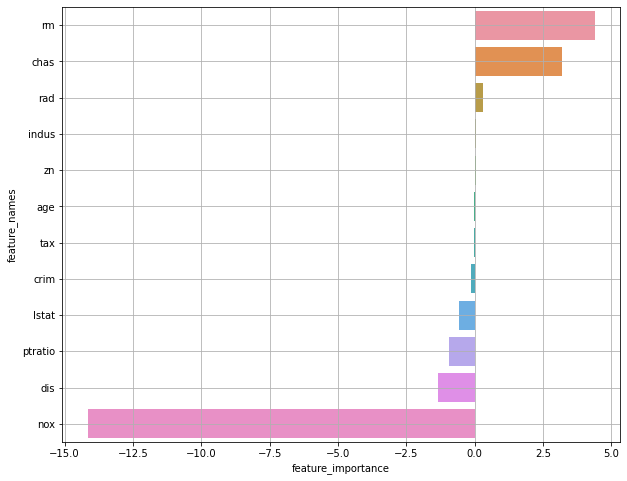

In [186]:
plot_feature_importance(model6.coef_, list(x_train))

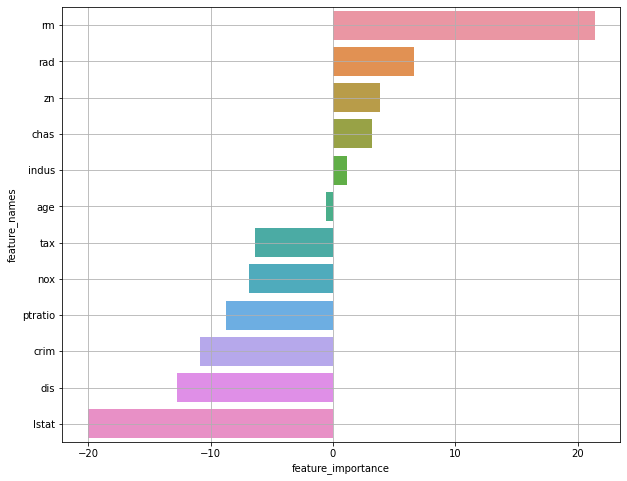

In [187]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)

model7 = LinearRegression()
model7.fit(x_train_s, y_train)

r = plot_feature_importance(model7.coef_, list(x_train))